In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
# import options data
data = pd.read_csv("NDXP.csv").sort_values(by=['quote_date', 'strike']).reset_index(drop = True)
data['quote_date'] = pd.to_datetime(data['quote_date'])
data['expiration'] = pd.to_datetime(data['expiration'])
data

,quote_date,expiration,strike,option_type,bid_1545,ask_1545
0,2018-01-04,2018-02-02,6200.0,C,401.9,423.0
1,2018-01-04,2018-02-02,6200.0,P,11.8,16.0
2,2018-01-04,2018-02-09,6200.0,C,406.2,427.0
3,2018-01-04,2018-02-09,6200.0,P,18.7,23.0
4,2018-01-04,2018-02-23,6200.0,C,417.5,439.0
...,...,...,...,...,...,...
7226456,2022-12-30,2023-01-06,16000.0,P,5106.0,5122.1
7226457,2022-12-30,2023-01-13,16000.0,C,0.0,0.9
7226458,2022-12-30,2023-01-13,16000.0,P,5089.8,5106.2
7226459,2022-12-30,2023-01-27,16000.0,C,0.0,1.2


In [157]:
# import interest rate data
rates = pd.read_csv("DGS1MO.csv").ffill()
rates.replace('.', pd.NA, inplace=True)
rates.columns = ['date','rate']
rates['date'] = pd.to_datetime(rates['date'])
rates['rate'] = (pd.to_numeric(rates['rate'])/100).fillna(method='ffill')
rates

,date,rate
0,2018-01-02,0.0129
1,2018-01-03,0.0129
2,2018-01-04,0.0128
3,2018-01-05,0.0127
4,2018-01-08,0.0130
...,...,...
1299,2022-12-26,0.0380
1300,2022-12-27,0.0387
1301,2022-12-28,0.0386
1302,2022-12-29,0.0404


In [158]:
# second fridays between 2018 and 2022

all_fridays = pd.date_range(start="2018-01-01", end="2022-12-31", freq='W-FRI') ## all fridays in the period

second_fridays = [] # initialize second fridays list

for friday in all_fridays: # loop through every friday and determine if it is second friday
    month_start = pd.offsets.MonthBegin(1) # create a date offset to move friday to start of the month
    if len(pd.date_range(start = friday - month_start, end = friday, freq='W-FRI')) == 2: # if number of fridays since start of month is 2:
        second_fridays.append(friday)

second_fridays = pd.Series(second_fridays)
second_fridays

0    2018-01-12
1    2018-02-09
2    2018-03-09
3    2018-04-13
4    2018-05-11
5    2018-06-08
6    2018-07-13
7    2018-08-10
8    2018-09-14
9    2018-10-12
10   2018-11-09
11   2018-12-14
12   2019-01-11
13   2019-02-08
14   2019-03-08
15   2019-04-12
16   2019-05-10
17   2019-06-14
18   2019-07-12
19   2019-08-09
20   2019-09-13
21   2019-10-11
22   2019-11-08
23   2019-12-13
24   2020-01-10
25   2020-02-14
26   2020-03-13
27   2020-04-10
28   2020-05-08
29   2020-06-12
30   2020-07-10
31   2020-08-14
32   2020-09-11
33   2020-10-09
34   2020-11-13
35   2020-12-11
36   2021-01-08
37   2021-02-12
38   2021-03-12
39   2021-04-09
40   2021-05-14
41   2021-06-11
42   2021-07-09
43   2021-08-13
44   2021-09-10
45   2021-10-08
46   2021-11-12
47   2021-12-10
48   2022-01-14
49   2022-02-11
50   2022-03-11
51   2022-04-08
52   2022-05-13
53   2022-06-10
54   2022-07-08
55   2022-08-12
56   2022-09-09
57   2022-10-14
58   2022-11-11
59   2022-12-09
dtype: datetime64[ns]

In [159]:
# get second-friday expirations
second_fridays_series = pd.Series(second_fridays)
second_friday_data = data[data['expiration'].isin(second_fridays_series)]

# only get quotes that are one month before every expiration
second_friday_data = second_friday_data[(second_friday_data['expiration'] - second_friday_data['quote_date']).dt.days == 28].reset_index(drop = True)
second_friday_data

,quote_date,expiration,strike,option_type,bid_1545,ask_1545
0,2018-01-12,2018-02-09,5400.0,C,1347.00,1368.30
1,2018-01-12,2018-02-09,5400.0,P,0.05,3.10
2,2018-01-12,2018-02-09,5500.0,C,1248.00,1269.00
3,2018-01-12,2018-02-09,5500.0,P,0.25,3.70
4,2018-01-12,2018-02-09,5600.0,C,1151.60,1165.90
...,...,...,...,...,...,...
21791,2022-11-11,2022-12-09,14800.0,P,2939.00,2963.80
21792,2022-11-11,2022-12-09,14900.0,C,0.00,2.10
21793,2022-11-11,2022-12-09,14900.0,P,3038.60,3063.30
21794,2022-11-11,2022-12-09,15000.0,C,0.00,1.95


In [160]:
# Make sure bid < ask ( buy < sell)
second_friday_data = second_friday_data[second_friday_data['bid_1545'] < second_friday_data['ask_1545']]
second_friday_data

,quote_date,expiration,strike,option_type,bid_1545,ask_1545
0,2018-01-12,2018-02-09,5400.0,C,1347.00,1368.30
1,2018-01-12,2018-02-09,5400.0,P,0.05,3.10
2,2018-01-12,2018-02-09,5500.0,C,1248.00,1269.00
3,2018-01-12,2018-02-09,5500.0,P,0.25,3.70
4,2018-01-12,2018-02-09,5600.0,C,1151.60,1165.90
...,...,...,...,...,...,...
21791,2022-11-11,2022-12-09,14800.0,P,2939.00,2963.80
21792,2022-11-11,2022-12-09,14900.0,C,0.00,2.10
21793,2022-11-11,2022-12-09,14900.0,P,3038.60,3063.30
21794,2022-11-11,2022-12-09,15000.0,C,0.00,1.95


In [161]:
# organise puts and calls for each strike and date
calls = second_friday_data[second_friday_data['option_type'] == "C"]
puts = second_friday_data[second_friday_data['option_type'] == "P"]
merged_options = pd.merge(calls, puts, on=['quote_date', 'strike'], suffixes=('_C','_P'), how='inner')[['quote_date',
                                                                                                     'expiration_C',
                                                                                                     'strike',
                                                                                                     'bid_1545_C',
                                                                                                     'ask_1545_C',
                                                                                                     'bid_1545_P',
                                                                                                     'ask_1545_P']]


# get 1 month rates on each date
merged_data = pd.merge(merged_options, rates, left_on='quote_date', right_on='date', how='left')

# use put call parity to get underlying price
merged_data['implied_S'] = (merged_data['bid_1545_C'] + merged_data['ask_1545_C'])/2 + merged_data['strike']/((1+merged_data['rate'])**(1/12)) - (merged_data['bid_1545_P'] + merged_data['ask_1545_P'])/2
merged_data['distance_to_strike'] = merged_data['implied_S'] - merged_data['strike']
merged_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S,distance_to_strike
0,2018-01-12,2018-02-09,5400.0,1347.00,1368.30,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453
1,2018-01-12,2018-02-09,5500.0,1248.00,1269.00,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054
2,2018-01-12,2018-02-09,5600.0,1151.60,1165.90,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655
3,2018-01-12,2018-02-09,5700.0,1052.40,1066.70,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256
4,2018-01-12,2018-02-09,5800.0,953.10,967.40,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857
...,...,...,...,...,...,...,...,...,...,...,...
10893,2022-11-11,2022-12-09,14600.0,0.20,2.60,2740.00,2764.7,2022-11-11,0.0371,11804.796038,-2795.203962
10894,2022-11-11,2022-12-09,14700.0,0.10,2.40,2839.40,2864.2,2022-11-11,0.0371,11804.892928,-2895.107072
10895,2022-11-11,2022-12-09,14800.0,0.05,2.25,2939.00,2963.8,2022-11-11,0.0371,11804.889819,-2995.110181
10896,2022-11-11,2022-12-09,14900.0,0.00,2.10,3038.60,3063.3,2022-11-11,0.0371,11804.936710,-3095.063290


In [162]:
# might need to consider picking a single implied S (maybe one closest to at the money?)
def get_at_the_money(group): 
    return group.iloc[(group['distance_to_strike'].abs()).argmin()] # for each date, get most at the money strike
at_the_money_df = merged_data.groupby('quote_date').apply(get_at_the_money)[['quote_date', 'implied_S']] # pull out the calculated S for most at the money strike
at_the_money_df.reset_index(drop=True, inplace=True)
merged_data_new = pd.merge(merged_data, at_the_money_df, left_on='quote_date', right_on='quote_date', how='left')
merged_data_new

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y
0,2018-01-12,2018-02-09,5400.0,1347.00,1368.30,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453,6751.233067
1,2018-01-12,2018-02-09,5500.0,1248.00,1269.00,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067
2,2018-01-12,2018-02-09,5600.0,1151.60,1165.90,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067
3,2018-01-12,2018-02-09,5700.0,1052.40,1066.70,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067
4,2018-01-12,2018-02-09,5800.0,953.10,967.40,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067
...,...,...,...,...,...,...,...,...,...,...,...,...
10893,2022-11-11,2022-12-09,14600.0,0.20,2.60,2740.00,2764.7,2022-11-11,0.0371,11804.796038,-2795.203962,11805.333099
10894,2022-11-11,2022-12-09,14700.0,0.10,2.40,2839.40,2864.2,2022-11-11,0.0371,11804.892928,-2895.107072,11805.333099
10895,2022-11-11,2022-12-09,14800.0,0.05,2.25,2939.00,2963.8,2022-11-11,0.0371,11804.889819,-2995.110181,11805.333099
10896,2022-11-11,2022-12-09,14900.0,0.00,2.10,3038.60,3063.3,2022-11-11,0.0371,11804.936710,-3095.063290,11805.333099


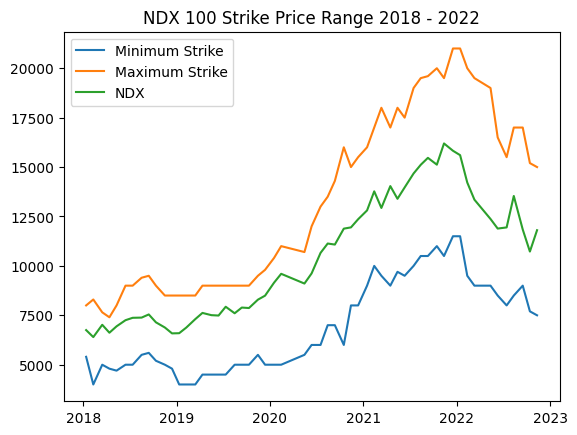

In [163]:
def strike_min(group):
    return group['strike'].min() # smallest strike on a given date

def strike_max(group):
    return group['strike'].max() # largest strike on a given date

def NDX(group):
    return group['implied_S_y'].max() # implied NDX on a given date


plt.plot(merged_data_new.groupby("quote_date").apply(strike_min), label = "Minimum Strike")
plt.plot(merged_data_new.groupby("quote_date").apply(strike_max), label = "Maximum Strike")
plt.plot(merged_data_new.groupby("quote_date").apply(NDX), label = "NDX")
plt.title("NDX 100 Strike Price Range 2018 - 2022")
plt.legend()
plt.show()

In [164]:
merged_data_new["adjusted_strike"] = np.round(merged_data_new["strike"]/merged_data_new["implied_S_y"],3)
merged_data_new

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike
0,2018-01-12,2018-02-09,5400.0,1347.00,1368.30,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453,6751.233067,0.800
1,2018-01-12,2018-02-09,5500.0,1248.00,1269.00,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067,0.815
2,2018-01-12,2018-02-09,5600.0,1151.60,1165.90,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067,0.829
3,2018-01-12,2018-02-09,5700.0,1052.40,1066.70,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067,0.844
4,2018-01-12,2018-02-09,5800.0,953.10,967.40,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067,0.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,2022-11-11,2022-12-09,14600.0,0.20,2.60,2740.00,2764.7,2022-11-11,0.0371,11804.796038,-2795.203962,11805.333099,1.237
10894,2022-11-11,2022-12-09,14700.0,0.10,2.40,2839.40,2864.2,2022-11-11,0.0371,11804.892928,-2895.107072,11805.333099,1.245
10895,2022-11-11,2022-12-09,14800.0,0.05,2.25,2939.00,2963.8,2022-11-11,0.0371,11804.889819,-2995.110181,11805.333099,1.254
10896,2022-11-11,2022-12-09,14900.0,0.00,2.10,3038.60,3063.3,2022-11-11,0.0371,11804.936710,-3095.063290,11805.333099,1.262


In [165]:
def adj_strike_min(group):
    return group['adjusted_strike'].min() # smallest adj strike on a given date

def adj_strike_max(group):
    return group['adjusted_strike'].max() # largest adj strike on a given date

subset_min = merged_data_new.groupby("quote_date").apply(adj_strike_min).max()
subset_max = merged_data_new.groupby("quote_date").apply(adj_strike_max).min()
print(subset_min, subset_max)

0.8 1.09


In [166]:
filtered_data = merged_data_new[(merged_data_new["adjusted_strike"] <= subset_max) & (merged_data_new["adjusted_strike"] >= subset_min)]
filtered_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike
0,2018-01-12,2018-02-09,5400.0,1347.0,1368.3,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453,6751.233067,0.800
1,2018-01-12,2018-02-09,5500.0,1248.0,1269.0,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067,0.815
2,2018-01-12,2018-02-09,5600.0,1151.6,1165.9,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067,0.829
3,2018-01-12,2018-02-09,5700.0,1052.4,1066.7,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067,0.844
4,2018-01-12,2018-02-09,5800.0,953.1,967.4,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067,0.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,2022-11-11,2022-12-09,12750.0,58.8,61.6,957.50,976.8,2022-11-11,0.0371,11804.403560,-945.596440,11805.333099,1.080
10838,2022-11-11,2022-12-09,12775.0,55.4,58.3,976.90,998.5,2022-11-11,0.0371,11805.427783,-969.572217,11805.333099,1.082
10839,2022-11-11,2022-12-09,12800.0,52.2,55.0,1000.60,1020.3,2022-11-11,0.0371,11804.352006,-995.647994,11805.333099,1.084
10840,2022-11-11,2022-12-09,12825.0,49.1,52.0,1020.20,1042.2,2022-11-11,0.0371,11805.476228,-1019.523772,11805.333099,1.086


In [173]:
def group_length(group):
    return len(group)

filtered_data.groupby("quote_date").apply(group_length)

quote_date
2018-01-12    111
2018-02-09    102
2018-03-16    119
2018-04-13     74
2018-05-11     68
2018-06-15    116
2018-07-13    135
2018-08-17     68
2018-09-14     52
2018-10-12     74
2018-11-16     50
2018-12-14     41
2019-01-11     70
2019-02-08     65
2019-03-15     80
2019-04-12    121
2019-05-17     72
2019-06-14     82
2019-07-12    131
2019-08-16     76
2019-09-13    131
2019-10-11     83
2019-11-15    151
2019-12-13     65
2020-01-17    142
2020-02-14     98
2020-05-15    106
2020-06-12    112
2020-07-17    124
2020-08-14    130
2020-09-11    110
2020-10-16    138
2020-11-13    139
2020-12-11    144
2021-01-15    141
2021-02-12    160
2021-03-12    151
2021-04-16    164
2021-05-14    156
2021-06-11    163
2021-07-16    171
2021-08-13    176
2021-09-10    180
2021-10-15    176
2021-11-12    189
2021-12-17    184
2022-01-14    181
2022-02-11    166
2022-03-11    156
2022-05-13    141
2022-06-10    138
2022-07-15    139
2022-08-12    158
2022-09-16    137
2022-10-14    118

In [168]:
n_strikes = filtered_data.groupby("quote_date").apply(group_length).min()
n_strikes

41

In [169]:
def get_sample(group):
     return group.sample(n=n_strikes, replace = False)

sampled_data = filtered_data.groupby("quote_date").apply(get_sample).reset_index(drop = True).sort_values(by = ['quote_date', 'strike']).reset_index(drop = True)
sampled_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike
0,2018-01-12,2018-02-09,5700.0,1052.4,1066.7,1.7,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067,0.844
1,2018-01-12,2018-02-09,5800.0,953.1,967.4,2.4,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067,0.859
2,2018-01-12,2018-02-09,6100.0,658.0,672.1,6.4,9.0,2018-01-12,0.0131,6750.737660,650.737660,6751.233067,0.904
3,2018-01-12,2018-02-09,6125.0,633.6,647.7,6.9,9.7,2018-01-12,0.0131,6750.710560,625.710560,6751.233067,0.907
4,2018-01-12,2018-02-09,6250.0,513.0,525.7,10.3,13.2,2018-01-12,0.0131,6750.825062,500.825062,6751.233067,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,2022-11-11,2022-12-09,12425.0,121.9,126.4,697.2,714.5,2022-11-11,0.0371,11805.638666,-619.361334,11805.333099,1.052
2292,2022-11-11,2022-12-09,12500.0,103.7,107.7,753.3,771.6,2022-11-11,0.0371,11805.361334,-694.638666,11805.333099,1.059
2293,2022-11-11,2022-12-09,12575.0,87.8,91.5,811.6,830.9,2022-11-11,0.0371,11805.284002,-769.715998,11805.333099,1.065
2294,2022-11-11,2022-12-09,12700.0,66.1,69.2,916.1,933.2,2022-11-11,0.0371,11804.505115,-895.494885,11805.333099,1.076


In [170]:
sampled_data['ranked_strikes'] = sampled_data.groupby('quote_date')['strike'].rank(method='dense').astype(int)
sampled_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike,ranked_strikes
0,2018-01-12,2018-02-09,5700.0,1052.4,1066.7,1.7,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067,0.844,1
1,2018-01-12,2018-02-09,5800.0,953.1,967.4,2.4,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067,0.859,2
2,2018-01-12,2018-02-09,6100.0,658.0,672.1,6.4,9.0,2018-01-12,0.0131,6750.737660,650.737660,6751.233067,0.904,3
3,2018-01-12,2018-02-09,6125.0,633.6,647.7,6.9,9.7,2018-01-12,0.0131,6750.710560,625.710560,6751.233067,0.907,4
4,2018-01-12,2018-02-09,6250.0,513.0,525.7,10.3,13.2,2018-01-12,0.0131,6750.825062,500.825062,6751.233067,0.926,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,2022-11-11,2022-12-09,12425.0,121.9,126.4,697.2,714.5,2022-11-11,0.0371,11805.638666,-619.361334,11805.333099,1.052,37
2292,2022-11-11,2022-12-09,12500.0,103.7,107.7,753.3,771.6,2022-11-11,0.0371,11805.361334,-694.638666,11805.333099,1.059,38
2293,2022-11-11,2022-12-09,12575.0,87.8,91.5,811.6,830.9,2022-11-11,0.0371,11805.284002,-769.715998,11805.333099,1.065,39
2294,2022-11-11,2022-12-09,12700.0,66.1,69.2,916.1,933.2,2022-11-11,0.0371,11804.505115,-895.494885,11805.333099,1.076,40


In [171]:
NDX_100 = pd.read_csv('NDX100_Data.csv')
NDX_100.rename(columns = {'Close/Last':'NDX_Exp'}, inplace = True)
NDX_100['Date'] = pd.to_datetime(NDX_100['Date'])
sampled_data_new = pd.merge(left = sampled_data, right = NDX_100, left_on = 'expiration_C', right_on = 'Date', how = 'left')
sampled_data_new['PNL_C'] = sampled_data_new['NDX_Exp'] - sampled_data_new['strike'] - (sampled_data_new['bid_1545_C'] + sampled_data_new['ask_1545_C'])/2
sampled_data_new['PNL_P'] = sampled_data_new['strike'] - sampled_data_new['NDX_Exp'] - (sampled_data_new['bid_1545_P'] + sampled_data_new['ask_1545_P'])/2
PNL_data = sampled_data_new[['quote_date',
                             'strike',
                             'adjusted_strike',
                             'ranked_strikes',
                             'implied_S_y',
                             'NDX_Exp',
                             'PNL_C',
                             'PNL_P']]
PNL_data

,quote_date,strike,adjusted_strike,ranked_strikes,implied_S_y,NDX_Exp,PNL_C,PNL_P
0,2018-01-12,5700.0,0.844,1,6751.233067,6412.68,-346.87,-715.68
1,2018-01-12,5800.0,0.859,2,6751.233067,6412.68,-347.57,-616.43
2,2018-01-12,6100.0,0.904,3,6751.233067,6412.68,-352.37,-320.38
3,2018-01-12,6125.0,0.907,4,6751.233067,6412.68,-352.97,-295.98
4,2018-01-12,6250.0,0.926,5,6751.233067,6412.68,-356.67,-174.43
...,...,...,...,...,...,...,...,...
2291,2022-11-11,12425.0,1.052,37,11805.333099,11563.33,-985.82,155.82
2292,2022-11-11,12500.0,1.059,38,11805.333099,11563.33,-1042.37,174.22
2293,2022-11-11,12575.0,1.065,39,11805.333099,11563.33,-1101.32,190.42
2294,2022-11-11,12700.0,1.076,40,11805.333099,11563.33,-1204.32,212.02


In [172]:
call_PNL = PNL_data.pivot(index='quote_date', columns='ranked_strikes', values='PNL_C')
put_PNL = PNL_data.pivot(index='quote_date', columns='ranked_strikes', values='PNL_P')
option_PNL = pd.merge(call_PNL , put_PNL, left_on = 'quote_date', right_on = 'quote_date', suffixes = ('_C',"_P"))
option_PNL

ranked_strikes,1_C,2_C,3_C,4_C,5_C,6_C,7_C,8_C,9_C,10_C,...,32_P,33_P,34_P,35_P,36_P,37_P,38_P,39_P,40_P,41_P
quote_date,,,,,,,,,,,,,,,,,,,,,
2018-01-12,-346.87,-347.57,-352.37,-352.97,-356.67,-357.92,-358.87,-361.92,-362.87,-363.97,...,288.52,296.47,309.67,315.37,319.97,327.37,331.32,341.42,343.97,344.87
2018-02-09,672.48,671.18,666.98,665.43,662.13,660.33,656.43,654.33,649.83,642.08,...,-731.53,-726.98,-722.83,-712.88,-710.93,-707.73,-707.08,-705.53,-705.73,-704.63
2018-03-16,-406.31,-409.46,-413.81,-416.66,-422.86,-424.51,-426.26,-428.66,-430.36,-437.31,...,356.16,362.51,365.01,370.31,372.81,387.66,390.56,392.81,399.91,399.81
2018-04-13,323.56,318.51,307.61,296.96,292.36,284.01,281.01,277.11,269.51,265.51,...,-400.96,-397.01,-393.46,-368.96,-362.51,-356.81,-347.41,-343.71,-333.81,-328.66
2018-05-11,201.72,201.77,201.42,201.47,200.92,200.52,200.32,200.12,200.17,199.37,...,-373.02,-339.07,-323.32,-308.32,-281.57,-249.27,-227.37,-217.92,-207.17,-202.17
2018-06-15,112.77,109.52,108.22,101.12,100.87,99.87,98.57,96.72,95.17,93.47,...,-203.57,-164.22,-147.52,-140.92,-123.72,-119.52,-113.92,-113.87,-112.97,-111.92
2018-07-13,19.55,16.85,16.15,15.65,15.00,10.50,6.95,5.25,5.25,4.80,...,-151.60,-133.15,-86.40,-82.05,-77.80,-70.15,-53.95,-48.40,-38.65,-28.35
2018-08-17,149.85,148.35,147.15,144.55,142.40,141.80,140.95,139.25,137.60,136.45,...,-179.00,-172.95,-163.90,-156.05,-153.10,-152.35,-152.10,-151.85,-151.65,-151.10
2018-09-14,-397.99,-399.39,-400.24,-401.39,-402.39,-404.94,-407.54,-409.54,-415.89,-422.44,...,379.69,384.09,387.04,389.59,391.94,393.19,395.69,396.94,397.89,398.74
